In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
import time
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [9]:
df = pd.read_csv("../datasets/digit_recognition/train.csv")
X = df.drop(columns=["label"])
y = df["label"]

In [10]:

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=0.95, whiten=True)
X_pca = pca.fit_transform(X_scaled)

print("N. Componenti:", X_pca.shape[1])  
print("Totale varianza spiegata:", pca.explained_variance_ratio_.sum())

N. Componenti: 320
Totale varianza spiegata: 0.950114674334634


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)


In [12]:
tree = DecisionTreeClassifier(random_state=42)
start = time.time()
tree.fit(x_train, y_train)
end = time.time()
print(f"Training time (PCA): {end - start:.4f} seconds")
print("Accuracy:", tree.score(x_test, y_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, tree.predict(x_test)))

Training time (PCA): 25.7511 seconds
Accuracy: 0.8045238095238095

Confusion Matrix:
 [[712   0  11  16   2  20  26   8  20  12]
 [  2 891   7   9   3   3   2   7   9   4]
 [ 16   7 644  37  21  15  32  13  42   8]
 [  9   8  30 666   9  54   8  16  49  21]
 [  8   5  13   9 623  14  18  24  19  81]
 [ 22   5  20  42  13 566  20   8  45  18]
 [ 20   1  13   1  16  10 751   1  11   3]
 [  4   3  11  18  17  10   3 717   8  89]
 [ 11  12  40  62  26  58   9  14 564  17]
 [  5   7   7  14  77  26   2  53  23 624]]


In [13]:
x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
tree = DecisionTreeClassifier(random_state=42)
start = time.time()
tree.fit(x_train_full, y_train)
end = time.time()
print(f"Training time (full features): {end - start:.4f} seconds")
print("Accuracy (full features):", tree.score(x_test_full, y_test))
print("\nConfusion Matrix (full features):\n", confusion_matrix(y_test, tree.predict(x_test_full)))

Training time (full features): 8.1799 seconds
Accuracy (full features): 0.8551190476190477

Confusion Matrix (full features):
 [[753   0  11   4   4  16  13   7  12   7]
 [  0 887   7   7   5   3   6   3  12   7]
 [ 10  17 701  21  10   7   8  12  35  14]
 [ 13  11  29 702  10  40   7  13  26  19]
 [  5   4   9   3 707  10  11  14  11  40]
 [  4   5  10  41   9 612  29   4  25  20]
 [ 10   4   7   6  16  19 740   0  22   3]
 [  3   6  18  25  11   5   0 779   9  24]
 [  9  22  31  30  16  32  17   6 623  27]
 [  7   3  17  22  42  22   3  23  20 679]]


**Spiegazione punto 8**

Il tempo di training con PCA è di circa 26 secondi, mentre il tempo di training senza PCA è di circa 8 secondi.
Per quanto riguarda l'accuracy, si presenta con un 80% con la PCA e 86% senza la PCA, aumentando di 6 punti percentuale senza l'applicazione della PCA per questo dataset specifico. Tale differenza nell'accuracy è da riportarsi dalla perdita di informazioni data dalla riduzione della dimensionalità con la PCA.

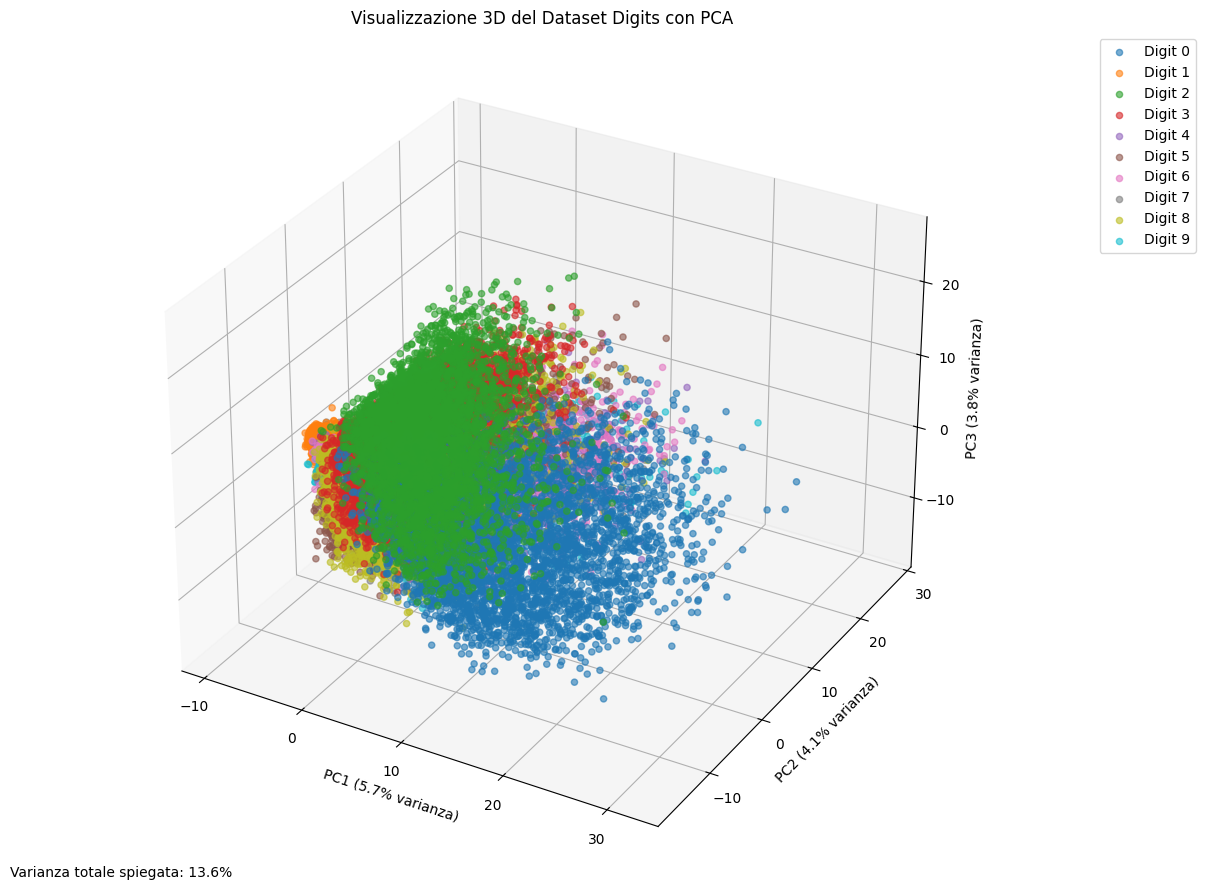

Varianza spiegata dalle prime 3 componenti: 0.136
Componenti principali: [0.05747953 0.04111691 0.03782867]


In [ ]:
# Visualizzazione PCA 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Crea una colormap per le classi (cifre 0-9)
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Plot per ogni cifra
for digit in range(10):
    mask = y == digit
    ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2], 
               c=[colors[digit]], label=f'Digit {digit}', alpha=0.6, s=20)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%} varianza)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%} varianza)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%} varianza)')
ax.set_title('Visualizzazione 3D del Dataset Digits con PCA')

# Legenda
ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left')

# Informazioni sulla varianza spiegata
total_variance = sum(pca_3d.explained_variance_ratio_)
plt.figtext(0.02, 0.02, f'Varianza totale spiegata: {total_variance:.1%}', fontsize=10)

plt.tight_layout()
plt.show()

print(f"Varianza spiegata dalle prime 3 componenti: {total_variance:.3f}")
print(f"Componenti principali: {pca_3d.explained_variance_ratio_}")